In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 
                 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 
                 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 
                 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 
                 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 
                 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster',
                 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta',
                 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits',
                 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof',
                 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG',
                 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1',
                 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 
                 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 
                 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 
                 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 
                 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 
                 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 
                 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 
                 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 
                 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2',
                 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1',
                 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]


In [4]:
Xall = train[all_variables]
yall = train['Truth']

print (f'Shape of X: {Xall.shape}')
print (f'Shape of y: {yall.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xall_train, Xall_test, yall_train, yall_test = train_test_split(Xall, yall, test_size=0.33, random_state=0)
scaler.fit(Xall_train)
Xall_train = scaler.transform(Xall_train)
Xall_test = scaler.transform(Xall_test)
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import shap
modelall = XGBRegressor()
modelall.fit(Xall_train,yall_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(modelall)
shap_values = explainer.shap_values(Xall_train)

In [ ]:
shap.summary_plot(shap_values, Xall_train,plot_type='bar')

In [6]:
shap_variables = ['p_f3','p_Rhad1','p_weta2','p_Reta','p_d0','p_E_Lr3_MedG','p_etconeCorrBitset','p_TRTTrackOccupancy','p_z0','p_Rhad','p_deltaEta1','p_d0Sig','p_ptconeCorrBitset','p_cellIndexCluster','p_etaCalo',]


In [7]:
X = train[shap_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of X: (162500, 15)
Shape of y: (162500,)


In [8]:
X = X[train['Truth'] == 1]
X.shape

(121495, 15)

## We are going to keep from the p_truth_E (energies in GeV) only the ones that are electrons. We observe that from the 162499 rows we keep in total 121495

In [9]:
y1 = train['p_truth_E']
y = y1[train['Truth'] == 1]
print(train["p_truth_E"])
print(y.shape)

0         127578.101562
1          12434.154297
2          47263.214844
3         145800.296875
4         147260.078125
              ...      
162495    133363.375000
162496    136817.828125
162497     94558.539062
162498    188060.390625
162499     63371.820312
Name: p_truth_E, Length: 162500, dtype: float32
(121495,)


## We are importing the StandardScaler in order to normalize our data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train.mean(axis=0)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_test.std(axis=0)

In [11]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import shap

In [12]:
model = XGBRegressor(objective="reg:linear",verbosity=0)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [14]:
score = model.score(X_train, y_train)
print(score)

0.7924688933056511


In [15]:
model.score(X_test, y_test)

0.7376957802116586

In [22]:
cv_score = cross_val_score(model, X_train, y_train, cv = 10)
print(cv_score)

[0.71948572 0.7322331  0.73333876 0.72877813 0.73307217 0.73101098
 0.73654821 0.72501582 0.72682242 0.73149918]


In [23]:
ypred = model.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print(np.sqrt(mse))
print(ypred)

23373.91
[217131.92 116684.89 123824.39 ... 194187.92  89931.15 181689.78]


In [27]:
testData = test[shap_variables]

In [30]:
predict_test = model.predict(testData)
predict_test = pd.DataFrame(predict_test)
#predict_test.columns = ["not an electron", "it is an electron"]
#predict_test = predict_test["it is an electron"]
print(predict_test)
predict_test.to_csv('Regression_IoannisMageiras_XGBoostTEST.txt', sep = ',', header = None, index = True, mode = 'a')

                    0
0        99896.898438
1        79680.765625
2       236025.703125
3       112898.382812
4        89393.562500
...               ...
160646  199074.906250
160647   69156.945312
160648  102538.398438
160649   79431.507812
160650  151392.187500

[160651 rows x 1 columns]


In [24]:
from sklearn.metrics import mean_absolute_error

### The mean absolute error is:

In [25]:
mae = mean_absolute_error(y_test,ypred)
print("Mean absolute error",mae)

Mean absolute error 17860.338


## Visually

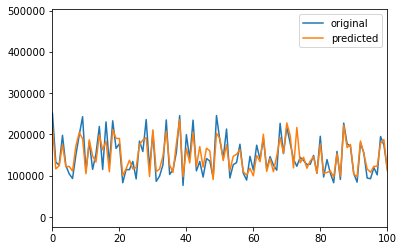

In [26]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label="original")
plt.plot(x_ax,ypred,label="predicted")
plt.xlim(0,100)
plt.legend();
plt.show()